# Inverse Methods

This is an example of a method to solve the "inverse problem" for the ODE $-y'' + qy = \lambda y$ with $y(0) = 0$ and $y'(0) = 1$. That is, given a $\lambda$ and a solution $y$ sampled at a few places, we want to reconstruct $q$. This is motivated by "inverse spectral theory" so we can think of $\lambda$ as being an eigenvalue (in which case, we'd have the condition $y(1) = 0$), but it doesn't need to be. For a $q$ with form $a + bx + cx^2$, we only need to sample at three places. In general, if there are $N$ unknowns in the potential $q$, we need to sample at $N$ places. 

In [1]:
from Direct import *
from Inverse import *
import numpy as np
import matplotlib.pyplot as plt

### Set Up

In the cell below, we create the basis functions. They are the first the Legendre Polynomials. The vector ```B``` will hold the basis functions and ```C``` will hold the coefficients. The vector ```S``` is the location of the sample points. 

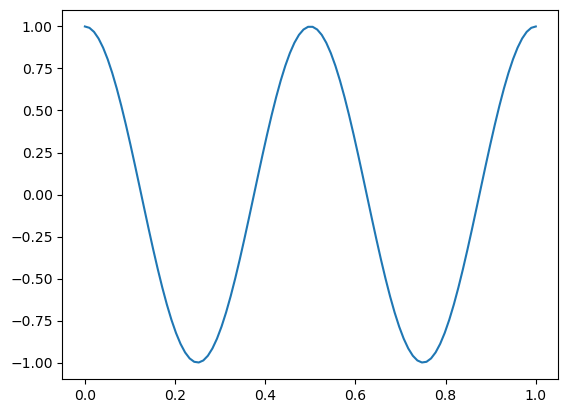

In [14]:
#B1 = [lambda x: 1 + 0*x, lambda x: 2*x - 1, lambda x: .5*(3*(2*x-1)**2 - 1), lambda x: x**4]
#B2 = [lambda x: 1 + 0*x, lambda x: 2*x - 1, lambda x: .5*(3*(2*x-1)**2 - 1), lambda x: .5*(5*(2*x-1)**3 - 3*(2*x-1))]
B1 = [lambda x: 1 + x*0, lambda x: np.exp(-20*(x - .5)**2), lambda x: x]
#Make Cosine Basis
N = 3
B2 = [lambda x: np.cos(np.pi*2*0*x), lambda x: np.cos(np.pi*2*1*x), lambda x: np.cos(np.pi*2*2*x)]
C = [1, -1, 0]
S = [.3, .4, .6]
#S = [.1, .2, .4]
plt.plot(np.linspace(0,1,100), B2[2](np.linspace(0,1,100)))

### Create Data

First, create spectral data to illustrate how the inverse method works. We graph the potential and the first eigenfunction to verify that our direct method works properly. In practice, this data is "given". The orange curve is the potential and the blue curve is the first eigenfunction (the function we're sampling). The green dots are the sample points.

Text(0, 0.5, 'y')

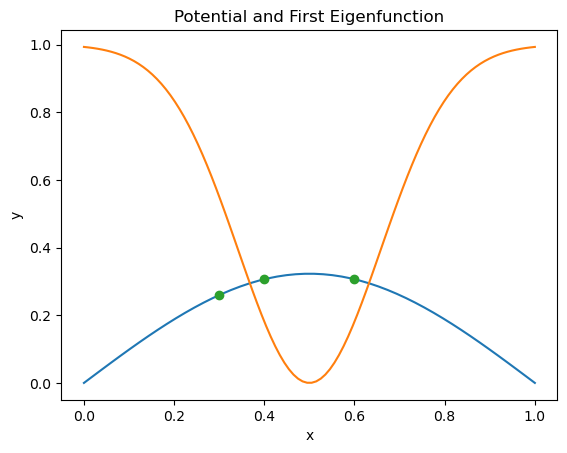

In [15]:
pot = lambda x: sum([a*b(x) for a,b in zip(C, B1)])
direct = Direct(q = pot, ne = len(B1), nsp = 50)
plt.plot(direct.get_sp(), direct.get_func(0))
plt.plot(np.linspace(0,1,100), pot(np.linspace(0,1,100)))
sv = direct.get_tsv(direct.get_evals()[0]*np.ones(len(B1)), S)
plt.plot(S, sv, 'o')
plt.title("Potential and First Eigenfunction")
plt.xlabel("x")
plt.ylabel("y")

### The Inverse Method

Now test the inverse method. To compute the inverse, we need to know (1) $\lambda$ (2) $y'(0)$ (which we assume is $1$) and (3) the value of the solution at $N$ sample points. 

In [16]:
inv = Inverse(direct.get_evals()[0]*np.ones(len(B2)), S, sv, B2)
computedC = inv.get_pot_vec()

print("The given coefficents are {}".format(C))
print("The computed coefficients are {}".format(computedC))
print("The L2 Norm of the difference is {}".format(np.linalg.norm(C - computedC)))
print("The relative error of the difference (L^2 norm of difference / L^2 norm of C) is {}".format(
        np.linalg.norm(C - computedC) / np.linalg.norm(C)
    ))

[[ 0.00409907  0.00220576 -0.00087686]
 [ 0.00901974  0.00238478 -0.00372242]
 [ 0.02437143 -0.00535792 -0.00372972]]
CN = 25.801930498693235
iters = 6
The given coefficents are [1, -1, 0]
The computed coefficients are [ 0.60172619  0.47995461 -0.11544047]
The L2 Norm of the difference is 1.5369496322354892
The relative error of the difference (L^2 norm of difference / L^2 norm of C) is 1.0867875072958846


Next, we plot the two potentials.

Text(0.5, 1.0, 'Given Potential (Blue) and Computed Potential (Green)')

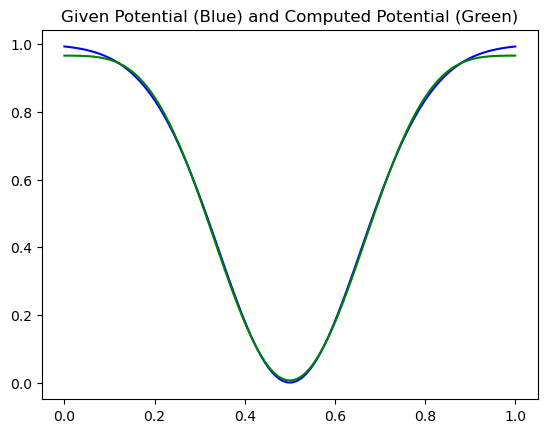

In [17]:
plt.plot(np.linspace(0,1,100), pot(np.linspace(0,1,100)), color = "blue")
comp_pot = inv.get_pot()
plt.plot(np.linspace(0,1,100), comp_pot(np.linspace(0,1,100)), color = "green")
plt.title("Given Potential (Blue) and Computed Potential (Green)")
#plt.ylim(-1.5,1.5)